In [1]:
from math import sqrt
from operator import itemgetter

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn import metrics

from AF import AverageFilling

# Load the records
records_train = np.loadtxt('../data/ml-100k/u1.base', dtype=np.int32)
records_test = np.loadtxt('../data/ml-100k/u1.test', dtype=np.int32)

# Preprocess
records_train[:, :2] -= 1
records_test[:, :2] -= 1
rating_test = records_test[:, 2]
records = np.vstack([records_train, records_test])

In [2]:
# Declare an Average Filler
af = AverageFilling(records_train, records_test)

# Predict
results = af.performance(records_test)
results_group = af.performance_on_user_segmentation()

/Users/mac/Downloads/recommender-algorithm-implementation/AF/AF.py:38: RuntimeWarning: invalid value encountered in true_divide
  np.sum(R, axis=0) / y_item,
/Users/mac/Downloads/recommender-algorithm-implementation/AF/AF.py:48: RuntimeWarning: invalid value encountered in true_divide
  np.sum(y * (R - self.r_u.reshape(-1, 1)), axis=0) / y_item,


(-0.05, 1.05)


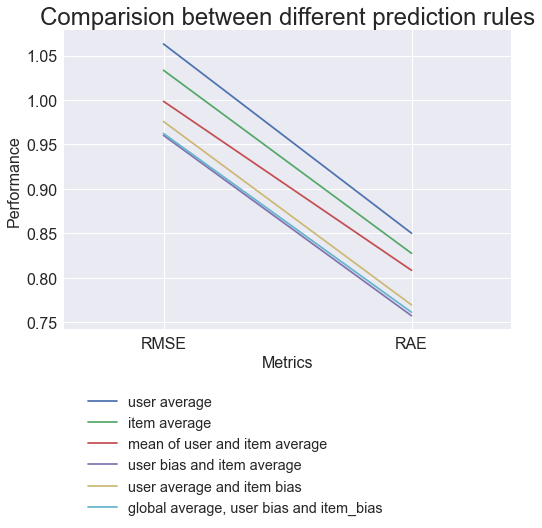

In [3]:
# Plot the figure
metrics = ['RMSE', 'RAE']
labels = ['user average', 'item average', 'mean of user and item average',
          'user bias and item average', 'user average and item bias', 
          'global average, user bias and item_bias']
plt.style.use('seaborn')
fig, ax = plt.subplots()

for result, label in zip(results, labels):
    ax.plot(metrics, result, label=label)

ax.legend(fontsize="x-large", loc=2, bbox_to_anchor=(0.04 ,-0.2),borderaxespad = 0.) 
x_major_locator= MultipleLocator(1)

ax.xaxis.set_major_locator(x_major_locator)

# Format plot
plt.title("Comparision between different prediction rules", fontsize=24)
plt.xlabel('Metrics', fontsize=16)
plt.ylabel("Performance", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

print(plt.xlim())

plt.xlim(-0.4, 1.4)

plt.show()

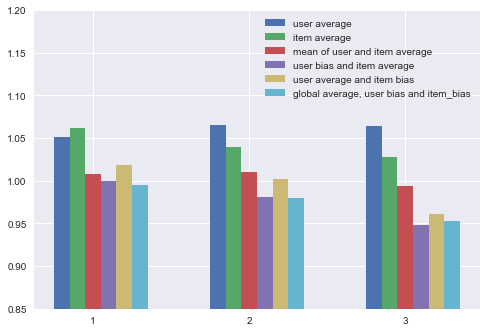

In [4]:
# Plot the figure for group testing
plt.style.use('seaborn')
groups = ["1","2","3"]
labels = ['user average', 'item average', 'mean of user and item average',
          'user bias and item average', 'user average and item bias', 
          'global average, user bias and item_bias']
positions = [0 + 0.3 * i for i in range(6)]

# plt.figure(figsize=(20,8),dpi=80)
for i in range(6):
        x = [positions[i] + 3 * j for j in range(3)]
        y = [results_group[i + j * 6][0] for j in range(3)]
        if i == 2:
            plt.xticks(x ,["1", "2", "3"])
        plt.bar(x, y, label=labels[i], width=0.3)

plt.ylim(0.85, 1.2)
plt.legend()

plt.show()